# Assignment 2 - Swarm Intelligence

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits import mplot3d

## Seed

In [2]:
np.random.seed(0)

## Exercise 2 - PSO

In [3]:
# Function to minimize
def f(x):
    return x**2

In [4]:
# Function to calculate pso
def execute_pso_algorithm(x, v, w, a1, a2, r1, r2):
    x_hist = [x]
    
    personal_best = 0
    global_best = 0
    
    for i in range(1, 100):
        v = (w * v) + (a1 * r1 * (personal_best - x)) + (a2 * r2 * (global_best - x))
        x = x + v
        
        personal_best = x if f(x) < f(personal_best) else personal_best
        global_best = x if f(x) < f(global_best) else global_best
        
        x_hist.append(x)
    
    return x_hist

In [5]:
# First settings
x = 20
v = 10
ω = 0.5
α1 = α2 = 1.5
r1 = r2 = 0.5

In [6]:
# Calculate pso based on the first settings
first_setting_res = execute_pso_algorithm(x, v, ω, α1, α2, r1, r2)

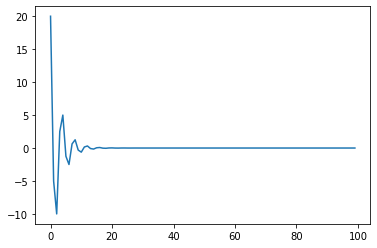

In [7]:
# Show pso in plot
plt.figure()
plt.plot(first_setting_res)
plt.show()

In [8]:
# Second settings
x = 20
v = 10
ω = 0.7
α1 = α2 = 1.5
r1 = r2 = 1

In [9]:
# Calculate pso based on the second settings
second_setting_res = execute_pso_algorithm(x, v, ω, α1, α2, r1, r2)

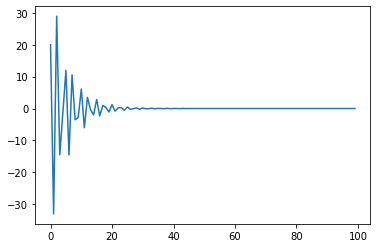

In [10]:
# Show pso in plot
plt.figure()
plt.plot(second_setting_res)
plt.show()